In [1]:
import model as m
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import TensorDataset,DataLoader

In [2]:
data = pd.read_csv('data/mnist_test.csv')
data = np.array(data)

In [3]:
testdata = data[:3000]
traindata = data[3000:]

test_label = testdata[:,0]
test_input = testdata[:,1:]/784 #784 pixels

train_label = traindata[:,0]
train_input = traindata[:,1:]/784

In [4]:
train_input.shape
train_label.shape

(7000,)

In [5]:
train_input = torch.tensor(train_input, dtype = torch.float32)
train_label = torch.tensor(train_label, dtype = torch.int64)
test_input = torch.tensor(test_input, dtype = torch.float32)
test_label = torch.tensor(test_label, dtype = torch.int64)

train_dataset = TensorDataset(train_input, train_label)
test_dataset = TensorDataset(test_input, test_label)

train_loader = DataLoader(train_dataset, shuffle=True)
test_loader = DataLoader(test_dataset, shuffle=False)

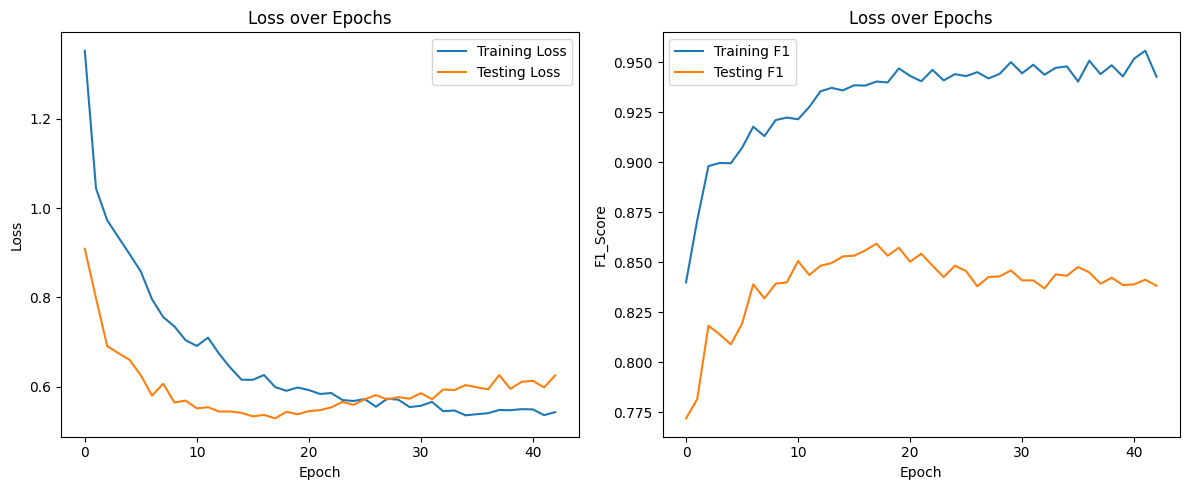

KeyboardInterrupt: 

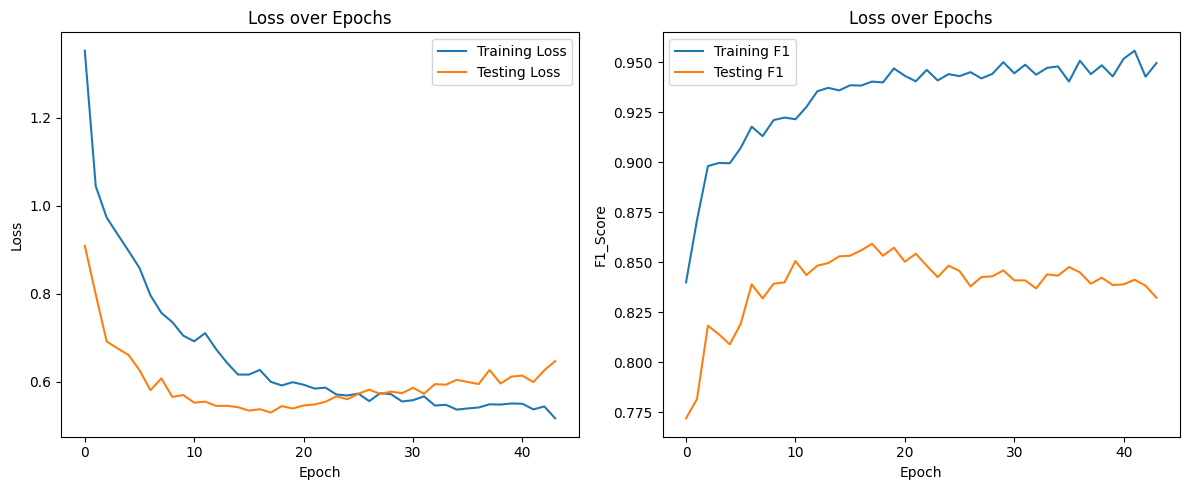

In [7]:
model = m.MLPmodel(784,10,10)
criterion = nn.CrossEntropyLoss()
optimizer = optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay= 1e-5)
m.train_model(model,criterion, optimizer, train_loader,test_loader)